In [5]:
# Welcome to Spotify Wrapped Albums!
# This notebook will take your Spotify Wrapped data and create a collage of your top albums.

# Import Playlist Instructions
# Go to Spotify, and access your Top 100 songs playlist. 
# Click the three dots and "Add To Other Playlist" to generate a public playlist.

# Copy the new playlists URL (Share -> Copy Playlist Link)
# And put it here! Feel free to erase mine.

playlist_url = "https://open.spotify.com/playlist/2H119t2oAtF4mkva6Oh2yq?si=03c5140d9f144f6d"

In [6]:
# Split the URL by the '/' character and get the part after 'playlist/'
playlist_part = playlist_url.split('/')[-1]

# Split this part by the '?' character to get the playlist ID
playlist_id = playlist_part.split('?')[0]

# Print the playlist ID
print(playlist_id)

2H119t2oAtF4mkva6Oh2yq


In [7]:
# This section makes the API call to Spotify to get the playlist data, and prints out the status of the call.
# A 200 means the call was successful!

import requests

# Define the URL
url = "https://accounts.spotify.com/api/token"

# Define the headers
headers = {
    "Content-Type": "application/x-www-form-urlencoded",
}

# Define the data
data = {
    "grant_type": "client_credentials",
    "client_id": "66199634274347538430009f1d54f87e",
    "client_secret": "84c6c86940154d0e84e05ed1ae75d9ae",
}

# Make the POST request
response = requests.post(url, headers=headers, data=data)

# Print the status code
status_code = response.status_code

# # Print the response text
# api_response = response.text

# Convert the response text to a dictionary
api_response = response.json()

# Get the access token
access_token = api_response['access_token']

# # Print the access token
# print(access_token)

# Define the URL
url = "https://api.spotify.com/v1/playlists/" + playlist_id

# Define the headers
headers = {
    "Authorization": f"Bearer {access_token}"
}

# Make the GET request
response = requests.get(url, headers=headers)

# Print the status code
print(response.status_code)

200


In [8]:
# This section creates a simple LinkedList data structure to keep track of the albums and their counts.
# It then loops through the tracks and increments the count of the album in the LinkedList.

# Note that I discount albums if they have 2 or less songs in them, so that
# singles don't show up in the collage.

class Node:
    def __init__(self, album_title):
        self.album_title = album_title
        self.count = 1
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None

    def increment(self, album_title):
        if not self.head:
            self.head = Node(album_title)
        else:
            current = self.head
            while current:
                if current.album_title == album_title:
                    current.count += 1
                    return
                if not current.next:
                    current.next = Node(album_title)
                    return
                current = current.next

# Initialize the LinkedList
albums = LinkedList()

# Extract the tracks from the playlist response
tracks = response.json()['tracks']['items']

# For each track
for track in tracks[:]:
    # Extract the album ID
    album_id = track['track']['album']['id']

    # Make a GET request to the Spotify API to get the album details
    album_response = requests.get(f"https://api.spotify.com/v1/albums/{album_id}", headers=headers)

    # Extract the album title
    album_title = album_response.json()['name']

    # Make a GET request to the Spotify API to get the album's tracks
    album_tracks_response = requests.get(f"https://api.spotify.com/v1/albums/{album_id}/tracks", headers=headers)

    # If the album does not have more than 2 songs, remove the track from tracks
    if album_tracks_response.json()['total'] <= 2:
        tracks.remove(track)
    else:
        # Increment the count of the album in the LinkedList
        albums.increment(album_title)

/var/folders/2n/lp7bxmg52694vd2dk1t58b840000gn/T/ipykernel_15150/139744731.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Album', data=df, orient='h', palette=palette)


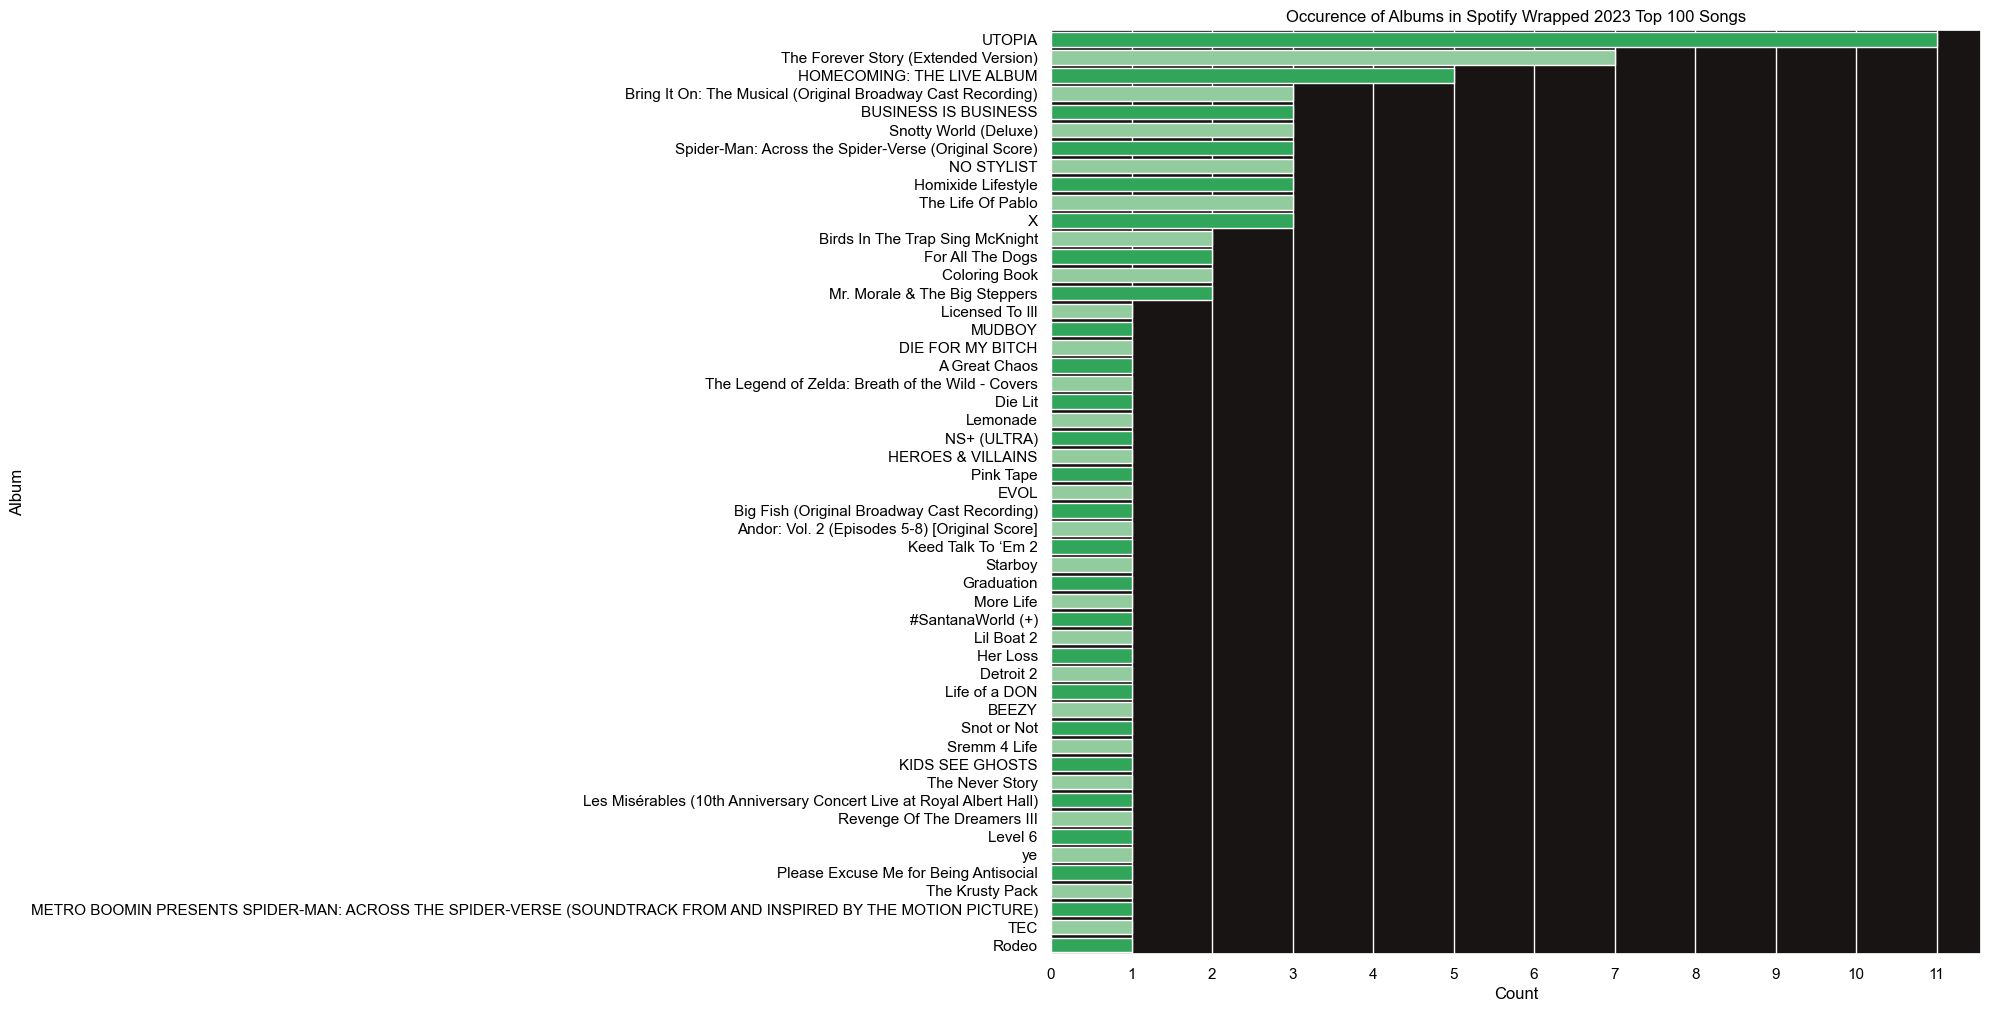

In [14]:
# Finally, this section handles the visualization of the data.
# It converts the LinkedList to a DataFrame, sorts it, and plots it.
# Feel free to alter the colors and the size of the plot to your liking!

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize an empty dictionary for album counts
album_counts = {}

# Set the current node to the head of the LinkedList
current = albums.head

# While the current node is not None
while current:
    # Add the current node's album title and count to the dictionary
    album_counts[current.album_title] = current.count

    # Set the current node to the next node
    current = current.next

# Convert the dictionary to a DataFrame
df = pd.DataFrame(list(album_counts.items()), columns=['Album', 'Count'])

# Sort the DataFrame by 'Count' in descending order
df = df.sort_values('Count', ascending=False)

# Create a color palette with alternating colors
palette = sns.color_palette(["#1DB954", "#88D498"], len(df))

# Change the background color and the color of the text
sns.set_theme(style="darkgrid", rc={"axes.facecolor": "#191414", "axes.labelcolor": "black", "text.color": "black", "xtick.color": "black", "ytick.color": "black"})

# Create a larger bar plot with seaborn
plt.figure(figsize=(12, 12))
sns.barplot(x='Count', y='Album', data=df, orient='h', palette=palette)
plt.title('Occurence of Albums in Spotify Wrapped 2023 Top 100 Songs')

# Add tick marks by increments of one
plt.xticks(range(0, df['Count'].max() + 1, 1))

plt.show()

In [3]:
url = "https://open.spotify.com/playlist/2H119t2oAtF4mkva6Oh2yq?si=11a650bfa4624382"
playlist_id = url.split('/')[-1]
if '?' in playlist_id:
    playlist_id = playlist_id.split('?')[0]
    print(playlist_id)

if not playlist_id:
    print ("Error: No playlist ID provided") 


2H119t2oAtF4mkva6Oh2yq
